In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
# 사이킷런 ≥0.20 필요
import sklearn
# assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 불필요한 경고를 무시 (사이파이 이슈 #5998 참조)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# DATA load

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
# train test split
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [5]:
X_train_full.shape

(60000, 28, 28)

In [8]:
# train -> train / valid, scaling X
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

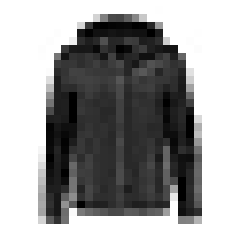

In [10]:
# data sample
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [12]:
# clothes type - label
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [11]:
# label에 대응되는 실제 패션아이템 종류 명
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [14]:
class_names[y_train[0]]

'Coat'

# Model building

### Sequential API

In [20]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28,28]))
model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [ ]:
# 위와 동일한 모델
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation = 'relu'),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

In [3]:
# 표기법을 더 간단히 하기 위해 아래와 같이 layers와 Dense를 직접 import 할 수 있음.
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense

layers.Dense(10)
Dense(10, activation = "relu")

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.layers

In [32]:
hidden1 = model.layers[1]

In [33]:
hidden1.name

'dense'

In [35]:
# layer 별로 가중치 확인 가능

weights, biases = hidden1.get_weights()
print(weights)
print(biases)
print(weights.shape)
print(biases.shape)

[[ 0.06948689 -0.07100198 -0.06578416 ... -0.05291844 -0.0524224
   0.01911979]
 [-0.00975551  0.00231802 -0.07024105 ... -0.06990121 -0.04690202
  -0.0021707 ]
 [ 0.05113547  0.02871118  0.03932127 ...  0.07339554  0.06695357
   0.05103433]
 ...
 [-0.02991271 -0.06533417  0.03232732 ...  0.01497146 -0.01946389
  -0.05498444]
 [ 0.00676036 -0.02124686 -0.00865311 ... -0.0533006  -0.00203201
  -0.06288942]
 [ 0.00173607  0.05808847  0.06725639 ... -0.06039989 -0.05915727
   0.01582919]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [36]:
# 모델 구성 완료후에는 loss와 optimizer를 정의하고 compile 해야함

model.compile(loss = "sparse_categorical_crossentropy",
             optimizer = "sgd",
            # optimizer = keras.optimizers.SGD(learning_rate = ***) 
             metrics = ["accuracy"])

In [37]:
## model fitting
# fit 메서드의 결과로 history라는 사전이 반환됨

history = model.fit(X_train, y_train, epochs = 30,
                   validation_data = (X_valid, y_valid) # or validation_split = 0.*)

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 4s 64us/sample - loss: 0.7184 - accuracy: 0.7671 - val_loss: 0.5002 - val_accuracy: 0.8352
Epoch 2/30
55000/55000 [==============================] - 3s 53us/sample - loss: 0.4876 - accuracy: 0.8299 - val_loss: 0.4381 - val_accuracy: 0.8516
Epoch 3/30
55000/55000 [==============================] - 3s 53us/sample - loss: 0.4460 - accuracy: 0.8444 - val_loss: 0.4404 - val_accuracy: 0.8416
Epoch 4/30
55000/55000 [==============================] - 3s 52us/sample - loss: 0.4185 - accuracy: 0.8532 - val_loss: 0.4091 - val_accuracy: 0.8596
Epoch 5/30
55000/55000 [==============================] - 3s 54us/sample - loss: 0.3981 - accuracy: 0.8607 - val_loss: 0.3932 - val_accuracy: 0.8670
Epoch 6/30
55000/55000 [==============================] - 3s 54us/sample - loss: 0.3817 - accuracy: 0.8662 - val_loss: 0.3908 - val_accuracy: 0.8644
Epoch 7/30
55000/55000 [==============================] -

In [39]:
# history에는 훈련과정의 epoch마다 loss, 측도값들이 기록됨
history.history

{'loss': [0.7184195636619221,
  0.4875795672633431,
  0.44597612406990744,
  0.41850424725792623,
  0.39805027519139374,
  0.3816612699942155,
  0.367346105631915,
  0.3558887342453003,
  0.3453217774261128,
  0.33550714169415563,
  0.32659341638521716,
  0.31836310350244695,
  0.3117792192925106,
  0.3045701993335377,
  0.29855753910758276,
  0.29161236288981,
  0.28474888961315153,
  0.280355303625627,
  0.27534914102337577,
  0.269727768666094,
  0.2642338270642541,
  0.2609371556715532,
  0.2559105119022456,
  0.2509750061219389,
  0.24648929111632434,
  0.2431863757133484,
  0.23834532617438922,
  0.23525945351557298,
  0.22971290050094778,
  0.2261997926701199],
 'accuracy': [0.7671091,
  0.8298909,
  0.8444,
  0.8532182,
  0.8606727,
  0.8662,
  0.8707273,
  0.8742,
  0.8763273,
  0.87996364,
  0.8831273,
  0.8854182,
  0.8871091,
  0.8902,
  0.8927636,
  0.8948727,
  0.8964,
  0.89754546,
  0.9002,
  0.90181816,
  0.90516365,
  0.9057091,
  0.9064364,
  0.9092364,
  0.9093818,


In [41]:
history.params

{'batch_size': 32,
 'epochs': 30,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [3]:
import pandas as pd

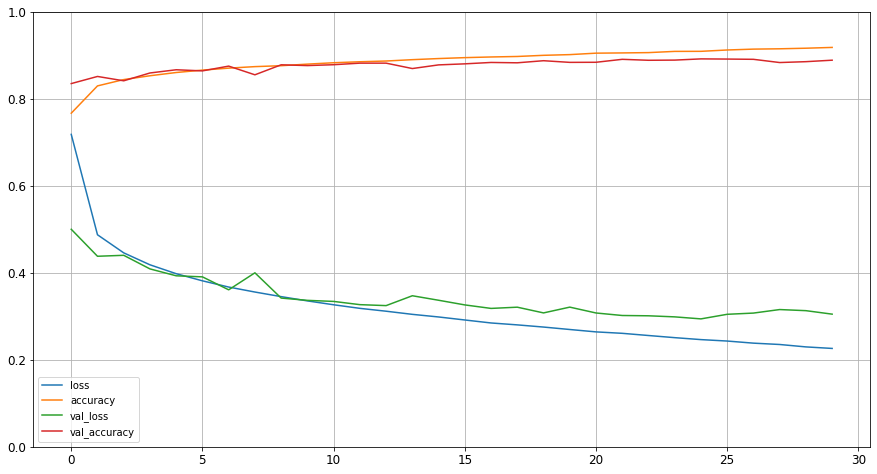

In [38]:
# learing curve (학습곡선)
# import pandas as pd

pd.DataFrame(history.history).plot(figsize = (15, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [42]:
# model evaluation
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 29us/sample - loss: 0.3449 - accuracy: 0.8762


[0.34491419517993926, 0.8762]

In [43]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.97],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [44]:
y_pred = model.predict_classes(X_new)
print(y_pred)
print(np.array(class_names)[y_pred])

[9 2 1]
['Ankle boot' 'Pullover' 'Trouser']


### MLP for Regression
###   
- 회귀를 위한 다중퍼셉트론

In [4]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [54]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = 'relu', input_shape = X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss = "mean_squared_error", optimizer = "sgd")

history = model.fit(X_train, y_train, epochs = 20,
                    validation_data = (X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

X_new = X_test[:3] # 새로 얻어진 데이터라고 가정
y_pred = model.predict(X_new)

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 51us/sample - loss: 0.8250 - val_loss: 0.6051
Epoch 2/20
11610/11610 [==============================] - 0s 37us/sample - loss: 0.5370 - val_loss: 1.1219
Epoch 3/20
11610/11610 [==============================] - 0s 36us/sample - loss: 0.5664 - val_loss: 0.4913
Epoch 4/20
11610/11610 [==============================] - 0s 34us/sample - loss: 0.4539 - val_loss: 0.4662
Epoch 5/20
11610/11610 [==============================] - 0s 31us/sample - loss: 0.4400 - val_loss: 0.4625
Epoch 6/20
11610/11610 [==============================] - 0s 30us/sample - loss: 0.4305 - val_loss: 0.4526
Epoch 7/20
11610/11610 [==============================] - 0s 31us/sample - loss: 0.4216 - val_loss: 0.4448
Epoch 8/20
11610/11610 [==============================] - 0s 31us/sample - loss: 0.4155 - val_loss: 0.4357
Epoch 9/20
11610/11610 [==============================] - 0s 42us/sample - loss: 0.4077 - val_l

### functional API
###   
시퀀셜 api가 사용이 간편하나, 더욱 자유로운 모델 구조가 필요한 경우
함수형 api를 사용할 수 있다.

In [62]:
input_ = keras.layers.Input(shape = X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation = "relu")(input_)
hidden2 = keras.layers.Dense(30, activation = "relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs = [input_], outputs = [output])

In [64]:
# Wide & Deep NN
input_A = keras.layers.Input(shape = [5], name = "wide_input")
input_B = keras.layers.Input(shape = [6], name = "deep_input")
hidden1 = keras.layers.Dense(30, activation = "relu")(input_B)
hidden2 = keras.layers.Dense(30, activation = "relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name = "output")(concat)
model = keras.Model(inputs = [input_A, input_B], outputs = [output])

In [65]:
model.compile(loss = "mse", optimizer = keras.optimizers.SGD(learning_rate = 1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs = 20,
                    validation_data = ((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 58us/sample - loss: 2.4024 - val_loss: 1.0875
Epoch 2/20
11610/11610 [==============================] - 0s 38us/sample - loss: 0.8885 - val_loss: 0.7889
Epoch 3/20
11610/11610 [==============================] - 0s 38us/sample - loss: 0.7504 - val_loss: 0.7186
Epoch 4/20
11610/11610 [==============================] - 0s 34us/sample - loss: 0.6924 - val_loss: 0.6761
Epoch 5/20
11610/11610 [==============================] - 0s 33us/sample - loss: 0.6527 - val_loss: 0.6445
Epoch 6/20
11610/11610 [==============================] - 0s 34us/sample - loss: 0.6218 - val_loss: 0.6191
Epoch 7/20
11610/11610 [==============================] - 0s 35us/sample - loss: 0.5958 - val_loss: 0.5980
Epoch 8/20
11610/11610 [==============================] - 0s 34us/sample - loss: 0.5755 - val_loss: 0.5808
Epoch 9/20
11610/11610 [==============================] - 0s 34us/sample - loss: 0.5584 - val_l

#### 여러 개의 출력이 필요한 경우

In [ ]:
input_A = keras.layers.Input(shape = [5], name = "wide_input")
input_B = keras.layers.Input(shape = [6], name = "deep_input")
hidden1 = keras.layers.Dense(30, activation = "relu")(input_B)
hidden2 = keras.layers.Dense(30, activation = "relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name = "main_output")(concat)
aux_output = keras.layers.Dense(1, name = "aux_output")(hidden2)
model = keras.Model(inputs = [input_A, input_B], outputs = [output, aux_output])

model.compile(loss = ["mse","mse"], loss_weights = [0.9, 0.1], optimizer = "sgd")

history = model.fit(
    [X_train_A, X_train_B], [y_train, y_train], epochs = 20,
    validation_data = ([X_valid_A, X_valid_B], [y_valid, y_valid]))

total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])

### subclassing API
###   
서브클래싱 api를 이용하여 동적모델(dynamic model) 만들기 (imperative programming)

In [ ]:
# 층 구성과 정방향 계산이 생성자 __init__와 call()메서드에 분리되었음
# 시퀀셜 api와 함수형 api에서는 한번에 정의 했었음

class WideAndDeepModel(keras.Model): 
    def __init__(self, inits = 30, activation = "relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation = activation)
        self.hidden2 = keras.layers.Dense(units, activation = activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
    
    # 이 메서드 안에서 원하는 어떠한 게산도 사용할 수 있다
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output
    
model = WideAndDeepModel()

# Model Save & Restore

In [ ]:
# 모델 저장
model = keras.models.Sequential([...])
model.compile([...])
model.fit([...])
model.save("my_keras_model.h5")

# 모델 불러오기
model = keras.models.load_model("my_keras_model.h5")

In [ ]:
[...] # 모델 만들고 컴파일 하기
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5")
history = model.fit(X_train, y_train, epochs = 10, callbacks = [checkpoint_cb])

In [ ]:
# 최상의 검증 세트 점수에서만 모델을 저장하도록 지정하는 방법
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only = True)
history = model.fit(X_train, y_train, epochs = 10,
                    validation_data = (X_valid, y_valid),
                    callbacks = [checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # 최상의 모델로 복원

In [ ]:
# 조기종료 구현
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 10,
                                                 restore_best_weights = True)
history = model.fit(X_train, y_train, epochs = 100,
                    validation_data = (X_valid, y_valid),
                    callbacks = [checkpoint_cb, early_stopping_cb])
# 체크포인트 저장 콜백과 조기종료 콜백을 함께 사용할 수 있다.
# EarlyStopping 콜백이 훈련이 끝난 후 최상의 가중치를 복원하기 때문에 젖아된 모델을 따로 복원할 필요 없음

# Visualization with TensorBoard

In [5]:
# 텐서보드 로그를 위해 사용할 루트 로그 디렉터리 정의
import os
root_logdir = os.path.join(os.curdir, "my_logs")

# 실행할 떄마다 실행 시각을 이름으로 하는 다른 서브디렉터리를 생성하는 함수 정의
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir() # 실행시마다 시각기준 다른이름의 서브디렉터리가 생성된다

In [7]:
# 모델구축, 컴파일
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [8]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5")

In [9]:
# 텐서보드 시각화를 위한 콜백객체를 호출 후 모델에 콜백 인자로 전달하여 학습 시작
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/30
11610/11610 [==============================] - 2s 174us/sample - loss: 2.6243 - val_loss: 0.8358
Epoch 2/30
11610/11610 [==============================] - 1s 106us/sample - loss: 0.7447 - val_loss: 0.6983
Epoch 3/30
11610/11610 [==============================] - 1s 104us/sample - loss: 0.6722 - val_loss: 0.6636
Epoch 4/30
11610/11610 [==============================] - 1s 104us/sample - loss: 0.6409 - val_loss: 0.6367
Epoch 5/30
11610/11610 [==============================] - 1s 105us/sample - loss: 0.6153 - val_loss: 0.6129
Epoch 6/30
11610/11610 [==============================] - 1s 105us/sample - loss: 0.5921 - val_loss: 0.5927
Epoch 7/30
11610/11610 [==============================] - 1s 102us/sample - loss: 0.5717 - val_loss: 0.5747
Epoch 8/30
11610/11610 [==============================] - 1s 101us/sample - loss: 0.5532 - val_loss: 0.5569
Epoch 9/30
11610/11610 [==============================] - 1s 105us/sample - loss: 0.536

In [10]:
# 주피터 노트북에서 텐서보드 바로 시각화하기
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

Reusing TensorBoard on port 6006 (pid 10596), started 0:24:51 ago. (Use '!kill 10596' to kill it.)

# NN Optimizing 
####   
아래와 같은 신경망의 하이퍼파라미터 튜닝을 고려할 수 있다.
* 은닉층 개수
* 은닉층의 뉴런 수
* 학습률  

In [12]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.model.Sequential()
    model.add(keras.layers.InputLayer(input_shape = input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation = "relu"))
    model.add(keras.layers.Dense(1)) # 출력층
    optimizer = keras.optimizers.SGD(lr = learning_rate)
    model.compile(loss = "mse", optimizer = optimizer)
    return model

In [13]:
# 사이킷런의 ML모델 튜닝방법을 그대로 사용하기 위해
# 케라스 모델을 사이킷런 API형태로 바꾼다. (wrapper로 감싸주기만 하면 됨)
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model) 

In [ ]:
keras_reg.fit(X_train, y_train, epochs = 100,
             validation_data = (X_valid, y_valid),
             callbacks = [keras.callbacks.EarlyStopping(patience = 10)])
mse_test = keras_reg.score(X_test, y_test)
y_pred = keras.reg.predict(X_new)

In [ ]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0,1,2,3],
    "n_neurons": np.arange(1,100),
    "learning_rate": reciprocal(3e-4, 3e-2)
}

# 아래와 같이 사이킷런의 랜덤서치cv를 신경망 모델에 적용할 수 있다.
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs = 100,
                 validation_data = (X_valid, y_valid),
                 callbacks = [keras.callbacks.EarlyStopping(patience = 10)])